# Outliers Removal Method

#### .Remove Outliers by Percentile Technique
#### .Remove Outliers by Stanadard Deviation
#### .Remove Outliers by Z Score

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mp.rcParams['figure.figsize'] = (12,8)

In [4]:
df=pd.read_csv(r'C:\Users\ayub_\AppData\Local\Temp\Temp1_archive (4).zip\bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [5]:
df["price_per_sqft"].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [16]:
minquan,maxquan=df["price_per_sqft"].quantile([0.001, 0.999])
minquan,maxquan

(1366.7554858934168, 50959.580419581405)

In [21]:
outliers=df[(df.price_per_sqft>maxquan) | (df.price_per_sqft<minquan)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9144,SARJAPUR BAGALUR ROAD,4 Bedroom,10961.0,4.0,80.0,4,7.298604e+02
7012,Srirampuram,1 BHK,650.0,1.0,500.0,1,7.692308e+04
7575,Raghuvanahalli,1 BHK,425.0,1.0,750.0,1,1.764706e+05
345,Suragajakkanahalli,3 Bedroom,11.0,3.0,74.0,3,6.727273e+05
7799,Vasanth nagar,4 BHK,2000.0,3.0,1063.0,4,5.315000e+04
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,7.653061e+04
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1.166667e+03
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,1.200000e+07
2392,Basavanagara,4 Bedroom,2000.0,3.0,25.0,4,1.250000e+03
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,5.600000e+04


In [22]:
df2=df[(df.price_per_sqft<maxquan) & (df.price_per_sqft>minquan)]
df2.shape

(13172, 7)

In [24]:
df.shape[0] - df2.shape[0]

28

In [26]:
max_limit=df2.price_per_sqft.mean() +4*df2.price_per_sqft.std()
min_limit=df2.price_per_sqft.mean() -4*df2.price_per_sqft.std()
max_limit,min_limit

(23228.112062975008, -9899.959266954284)

In [27]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12900,HAL 2nd Stage,5 Bedroom,2040.00,4.0,500.0,5,24509.803922
12051,Malleshwaram,5 Bedroom,3000.00,4.0,900.0,5,30000.000000
13127,5th Stage BEML Layout,4 Bedroom,1200.00,5.0,325.0,4,27083.333333
6135,2nd Block Hrbr Layout,3 Bedroom,4273.00,3.0,1100.0,3,25743.037678
5315,Banashankari Stage II,4 Bedroom,1500.00,2.0,650.0,4,43333.333333
190,Bellandur,4 Bedroom,1200.00,5.0,325.0,4,27083.333333
5654,2nd Block Jayanagar,4 Bedroom,4920.00,5.0,1150.0,4,23373.983740
12640,Langford Gardens,3 BHK,2777.29,5.0,649.0,3,23368.103439
5974,1A Block Koramangala,4 Bedroom,2360.00,4.0,650.0,4,27542.372881
8595,Basavanagara,3 Bedroom,1200.00,2.0,300.0,3,25000.000000


In [28]:
df3=df2[(df2.price_per_sqft<max_limit) & (df2.price_per_sqft>min_limit)]
df3.shape

(13047, 7)

In [29]:
df2.shape[0]-df3.shape[0]

125

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

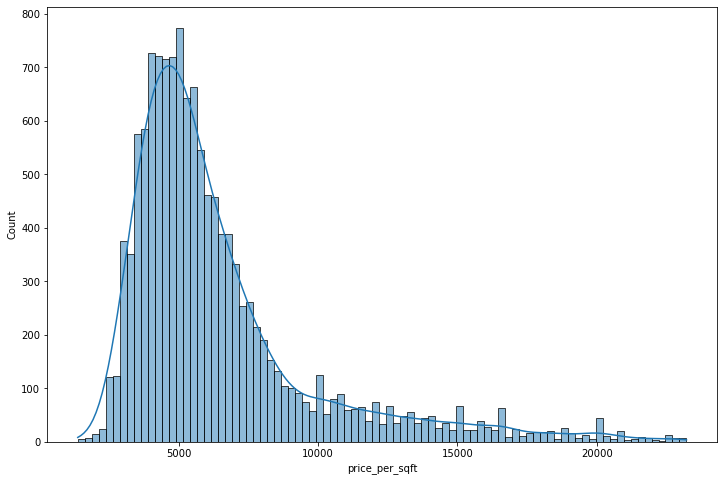

In [30]:
sns.histplot(df3.price_per_sqft,kde=True)

In [34]:
df2["Zscore"]=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()

C:\Users\ayub_\AppData\Local\Temp\ipykernel_10188\1474825014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Zscore"]=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


In [43]:
df2.drop(columns="Z score",axis=1,inplace=True)

C:\Users\ayub_\AppData\Local\Temp\ipykernel_10188\2842212724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns="Z score",axis=1,inplace=True)


In [45]:
z_outlier=df2[(df2.Zscore < -4) | (df2.Zscore > 4)]
z_outlier.shape

(125, 8)

In [46]:
df4=df2[(df2.Zscore > -4) & (df2.Zscore < 4)]
df4.shape

(13047, 8)

In [48]:
df2.shape[0]-df4.shape[0]

125